       time  gender   age  member             checkIn checkIn_str
0      95.0     1.0  24.0     3.0 1900-01-01 19:38:00       19:38
1      59.0     1.0  29.0     4.0 1900-01-01 18:52:00       18:52
2      97.0     1.0  26.0     3.0 1900-01-01 19:16:00       19:16
3     106.0     2.0  30.0     1.0 1900-01-01 19:20:00       19:20
4      88.0     2.0  33.0     3.0 1900-01-01 19:21:00       19:21
...     ...     ...   ...     ...                 ...         ...
2995   91.0     2.0  37.0     2.0 1900-01-01 19:30:00       19:30
2996   63.0     2.0  47.0     3.0 1900-01-01 20:07:00       20:07
2997   48.0     1.0  51.0     3.0 1900-01-01 20:08:00       20:08
2998   94.0     2.0  29.0     3.0 1900-01-01 19:30:00       19:30
2999   89.0     1.0  44.0     2.0 1900-01-01 19:43:00       19:43

[3000 rows x 6 columns]


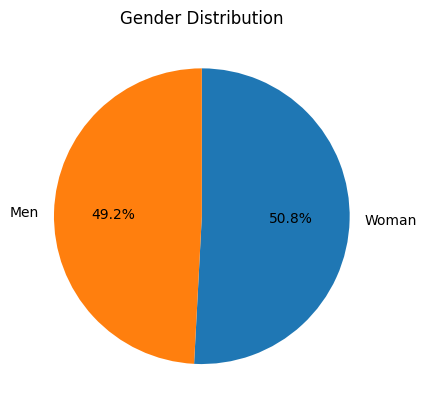

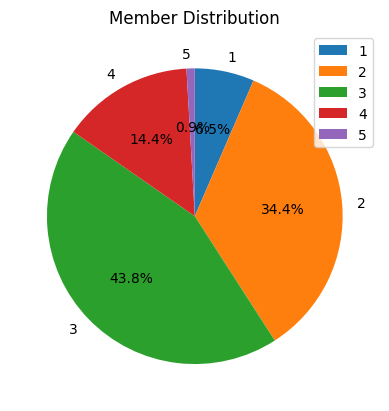

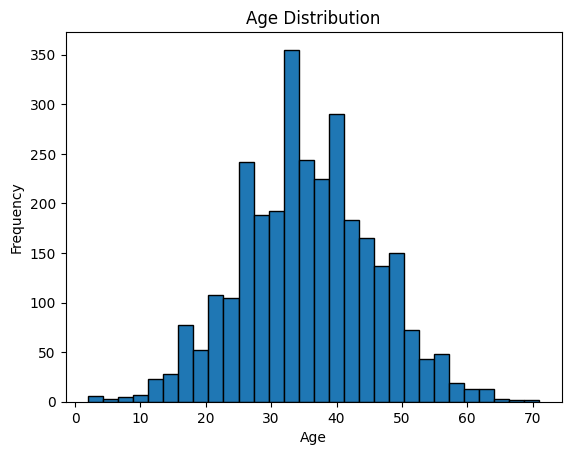

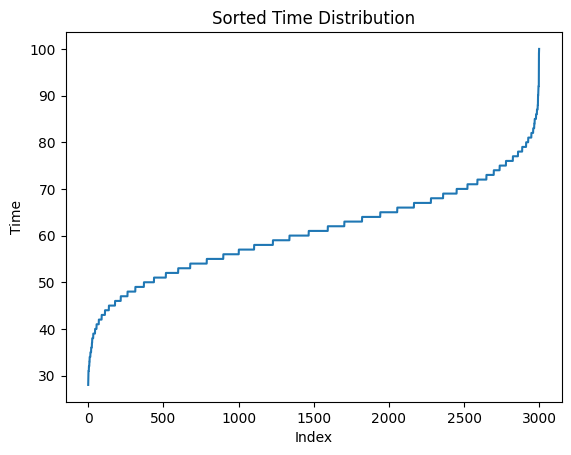

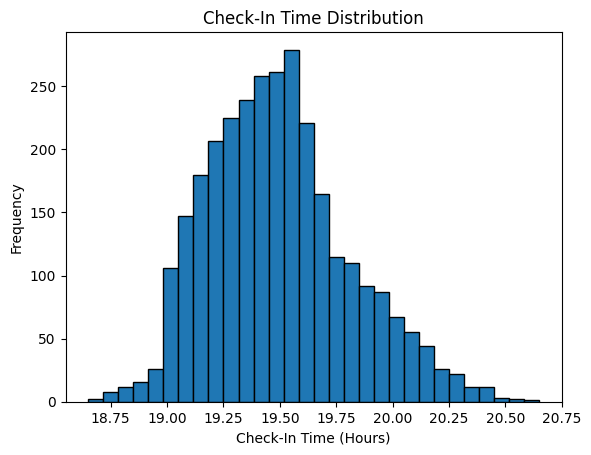

Mean Squared Error: 205.89
R^2 Score: -0.12


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

time_2405 = np.ceil(np.abs(np.random.normal(60, 10, 100 * 30)))
gender_2405 = np.ceil(np.abs(np.random.normal(1, 0.3, 100 * 30)))
age_2405 = np.ceil(np.abs(np.random.normal(35, 10, 100 * 30)))
member_2405 = np.ceil(np.abs(np.random.normal(2.2, 0.8, 100 * 30)))

checkIn_1 = np.ceil(np.abs(np.random.normal(1880, 15, 1000)))  # 17時前後のデータ
checkIn_2 = np.ceil(np.abs(np.random.normal(1920, 15, 1000)))  # 19時半前後のデータ
checkIn_3 = np.ceil(np.abs(np.random.normal(1945, 17, 1000)))  # 20時過ぎのデータ
checkIn_2405 = np.concatenate([checkIn_1, checkIn_2, checkIn_3])

def convert_to_time(n):
    hour = int(n // 100)
    minute = int(n % 100)
    return timedelta(hours=hour, minutes=minute)

checkIn_times = [convert_to_time(time) for time in checkIn_2405]

dataframe_2405 = pd.DataFrame({
    "time": time_2405, 
    "gender": gender_2405, 
    "age": age_2405, 
    "member": member_2405, 
    "checkIn": checkIn_times
})

dataframe_2405['checkIn_str'] = dataframe_2405['checkIn'].apply(lambda x: (datetime.min + x).strftime('%H:%M'))
dataframe_2405['checkIn'] = pd.to_datetime(dataframe_2405['checkIn_str'], format='%H:%M')


dataframe_2405.loc[
    (dataframe_2405['checkIn'].dt.hour == 19) & 
    (dataframe_2405['checkIn'].dt.minute >= 0) & 
    (dataframe_2405['checkIn'].dt.minute <= 59), 
    'time'
] += 30

print(dataframe_2405)

# ジェンダーのグループ化
group_1 = np.sum(gender_2405 == 1)
group_2 = np.sum(gender_2405 == 2)
sizes = [group_1, group_2]
labels = ['Woman', 'Men']

# 円グラフ
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%')
ax1.set_title('Gender Distribution')
plt.show()

# メンバーのグループ化
group_m1 = np.sum(member_2405 == 1)
group_m2 = np.sum(member_2405 == 2)
group_3 = np.sum(member_2405 == 3)
group_4 = np.sum(member_2405 == 4)
group_5 = np.sum(member_2405 == 5)
sizes = [group_m1, group_m2, group_3, group_4, group_5]
labels = ['1', '2', '3', '4', '5']

# 円グラフ
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%')
ax1.set_title('Member Distribution')
plt.legend()
plt.show()

# ヒストグラム
fig2, ax2 = plt.subplots()
ax2.hist(age_2405, bins=30, edgecolor='black')
ax2.set_title('Age Distribution')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
plt.show()


sorted_time_2405 = np.sort(time_2405)

# 折れ線グラフ
fig3, ax3 = plt.subplots()
ax3.plot(sorted_time_2405)
ax3.set_title('Sorted Time Distribution')
ax3.set_xlabel('Index')
ax3.set_ylabel('Time')
plt.show()

# ヒストグラム
checkIn_hours = [time.seconds / 3600 for time in checkIn_times]  # 時間に変換
fig4, ax4 = plt.subplots()
ax4.hist(checkIn_hours, bins=30, edgecolor='black')
ax4.set_title('Check-In Time Distribution')
ax4.set_xlabel('Check-In Time (Hours)')
ax4.set_ylabel('Frequency')
plt.show()

dataframe_2405['checkIn_hours'] = dataframe_2405['checkIn'].dt.hour + dataframe_2405['checkIn'].dt.minute / 60.0
X = dataframe_2405[['gender', 'age', 'checkIn_hours', 'member']]
y = dataframe_2405['time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 決定木モデルの訓練
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# 予測
y_pred = regressor.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

np.random.seed(42)

time = np.ceil(np.abs(np.random.normal(60, 10, 100 * 30)))
member = np.ceil(np.abs(np.random.normal(2.2, 0.8, 100 * 30)))

start_date = datetime(2023, 1, 1)
date_range = pd.date_range(start=start_date, periods=30)

date = np.tile(date_range, 100)
week = np.tile([d.weekday() + 1 for d in date_range], 100)

checkIn_1 = np.ceil(np.abs(np.random.normal(1880, 15, 1000)))  # 17時前後のデータ
checkIn_2 = np.ceil(np.abs(np.random.normal(1920, 15, 1000)))  # 19時半前後のデータ
checkIn_3 = np.ceil(np.abs(np.random.normal(1945, 17, 1000)))  # 20時過ぎのデータ
checkIn = np.concatenate([checkIn_1, checkIn_2, checkIn_3])

def convert_to_time(n):
    hour = int(n // 100)
    minute = int(n % 100)
    return timedelta(hours=hour, minutes=minute)

checkIn_times = [convert_to_time(time) for time in checkIn]

dataframe = pd.DataFrame({
    "time": time, 
    "member": member, 
    "checkIn": checkIn_times,
    "date": date,
    "week": week
})

dataframe['month'] = dataframe['date'].dt.month
dataframe['day'] = dataframe['date'].dt.day

dataframe['checkIn_str'] = dataframe['checkIn'].apply(lambda x: (datetime.min + x).strftime('%H:%M'))
dataframe['checkIn'] = pd.to_datetime(dataframe['checkIn_str'], format='%H:%M')

# 重みづけ
dataframe.loc[
    (dataframe['checkIn'].dt.hour == 19) & 
    (dataframe['checkIn'].dt.minute >= 0) & 
    (dataframe['checkIn'].dt.minute <= 59), 
    'time'
] += 30

dataframe.loc[
    (dataframe['checkIn'].dt.hour == 20) & 
    (dataframe['checkIn'].dt.minute >= 0) & 
    (dataframe['checkIn'].dt.minute <= 59), 
    'time'
] -= 20

dataframe.loc[
    (dataframe['member'] == 1.0), 
    'time'
] -= 10

dataframe.loc[
    (dataframe['member'] == 3.0) & 
    (dataframe['member'] == 4.0), 
    'time'
] += 30

dataframe.loc[
    (dataframe['member'] == 5.0), 
    'time'
] += 50

dataframe.loc[
    (dataframe['week'] == 5) | 
    (dataframe['week'] == 6) | 
    (dataframe['week'] == 7), 
    'time'
] += 20

# 金曜日、土曜日、日曜日の重みづけ
dataframe.loc[
    (dataframe['week'] == 2) | 
    (dataframe['week'] == 4),
    'time'
] -= 20

# 重みづけ終了

dataframe['checkIn_hours'] = dataframe['checkIn'].dt.hour + dataframe['checkIn'].dt.minute / 60.0
X = dataframe[['checkIn_hours', 'member', 'week', 'month', 'day']]
y = dataframe['time']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

joblib.dump(regressor, 'izakaya_stay_time_predictor.pkl')
joblib.dump(scaler, 'scaler.pkl')

Mean Squared Error: 515.62
R^2 Score: 0.20


['scaler.pkl']

In [5]:
import joblib
import numpy as np

model = joblib.load('izakaya_stay_time_predictor.pkl')
scaler = joblib.load('scaler.pkl')

def predict_stay_time(checkIn_hours, member, week, month, day):
    data = np.array([[checkIn_hours, member, week, month, day]])
    data_scaled = scaler.transform(data)
    predicted_time = model.predict(data_scaled)
    return predicted_time[0]

# テスト
checkIn_hours = 19
member = 3
week = 5
month = 3
day = 23

predicted_time = predict_stay_time(checkIn_hours, member, week, month, day)
print(f'滞在時間は {predicted_time:.2f} 分です')


滞在時間は: 116.80 分です


/Users/soukurakata/Documents/hal/就プレ/sample02/venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
